# Geometry Scratch
Development notebook for making GeometryHandler. Play around with autodiff

In [1]:
# %% Import JAX and enable 64-bit precision
import jax
jax.config.update("jax_enable_x64", True)

In [2]:
# %% Import other libraries
import equinox as eqx
import interpax
import diffrax
import optimistix as optx

import jax.numpy as jnp
import jax.tree_util as jtu
from dataclasses import dataclass
from functools import partial
import numpy as np
from collections import namedtuple
from typing import NamedTuple
import matplotlib.pyplot as plt

from netCDF4 import Dataset

from jaxtyping import ArrayLike, Real

In [81]:
# %% Load my own libraries
%load_ext autoreload
%autoreload 2
from c1lgkt.jax.fields.equilibrium import Equilibrium
import c1lgkt.jax.particles.particle_motion as particle_motion
import c1lgkt.jax.fields.geometry_handlers as geometry_handlers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Magnetic Geometry Stuff

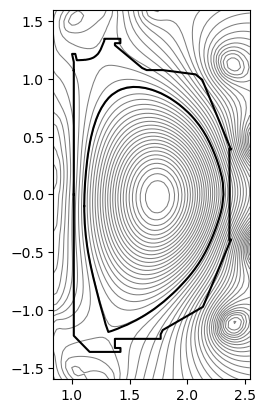

In [ ]:
# %% Load equilibrium
eq = Equilibrium.from_eqdfile('./tests/D3D141451.eqd')

plt.figure()
ax = plt.subplot(111)
eq.plot_magnetic_geometry(ax)

In [167]:
geom = geometry_handlers.GeometryHandler(eq)

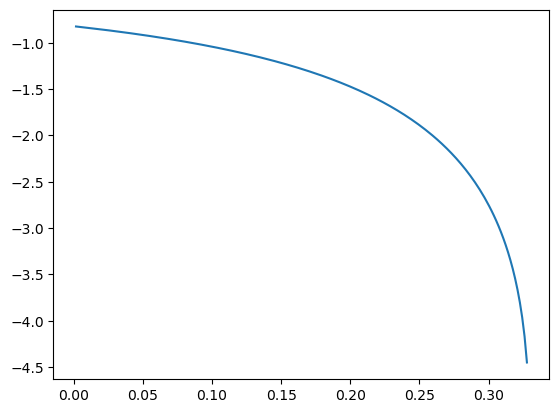

In [168]:
plt.figure()
plt.plot(geom.psi_surf, geom.q_surf)

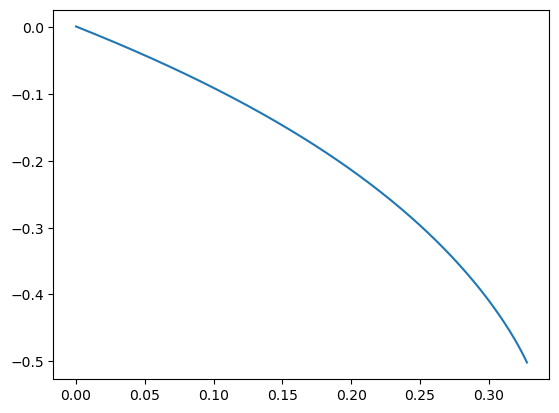

In [ ]:
test_interp = interpax.CubicSpline(geom.psi_surf, geom.q_surf)
tor_flux = test_interp.antiderivative()
psi_test = jnp.linspace(0, eq.psix*0.99, 1024)
interpax.P

plt.figure()
plt.plot(psi_test, tor_flux(psi_test))

In [164]:
dtheta_profile.shape

interp_dtheta = interpax.Interpolator2D(jnp.linspace(0, eq.psix, 194)[1:-1], jnp.linspace(0, 2*jnp.pi, 128, endpoint=False), dtheta_profile, period=(None, 2*jnp.pi))

In [162]:
np.max(dtheta_profile)

Array(0.86880941, dtype=float64)

In [148]:
interp_dtheta(0.1, 3*jnp.pi)

Array(0.0275226, dtype=float64)

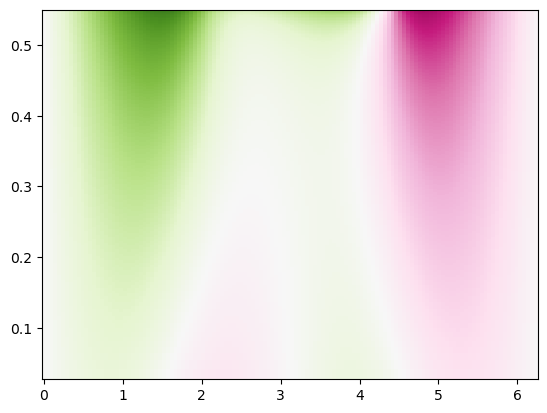

In [165]:
plt.figure()

plt.pcolormesh(jnp.linspace(0, 2*jnp.pi, 128, endpoint=False), r0 - eq.raxis, dtheta_profile, cmap='PiYG', vmin=-1, vmax=1)

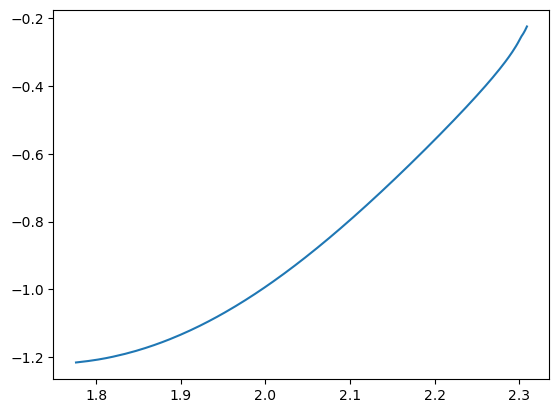

In [86]:
# %%

plt.figure()
plt.plot(r0, 1.0/q_profile)

In [139]:
(10*2 * jnp.pi * eq.raxis / jnp.max(eq.ff)) * 2e-3

Array(0.07430537, dtype=float64)

In [62]:
eq.zgrid

Array([-1.60000002, -1.55000002, -1.50000002, -1.45000002, -1.40000002,
       -1.35000002, -1.30000002, -1.25000002, -1.20000002, -1.15000002,
       -1.10000002, -1.05000002, -1.00000002, -0.95000001, -0.90000001,
       -0.85000001, -0.80000001, -0.75000001, -0.70000001, -0.65000001,
       -0.60000001, -0.55000001, -0.50000001, -0.45000001, -0.40000001,
       -0.35000001, -0.3       , -0.25      , -0.2       , -0.15      ,
       -0.1       , -0.05      ,  0.        ,  0.05      ,  0.1       ,
        0.15      ,  0.2       ,  0.25      ,  0.3       ,  0.35000001,
        0.40000001,  0.45000001,  0.50000001,  0.55000001,  0.60000001,
        0.65000001,  0.70000001,  0.75000001,  0.80000001,  0.85000001,
        0.90000001,  0.95000001,  1.00000002,  1.05000002,  1.10000002,
        1.15000002,  1.20000002,  1.25000002,  1.30000002,  1.35000002,
        1.40000002,  1.45000002,  1.50000002,  1.55000002,  1.60000002],      dtype=float64)

In [141]:
sol.ys[-1]

Array([0.        , 6.28318531], dtype=float64)